# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather=response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | callao
Processing Record 3 of Set 1 | toga village
City not found. Skipping...
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | jiwani
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | jinxiang
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | buala
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | poronaysk
Processing Record 13 of Set 1 | kharp
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | gannan
Processing Record 16 of Set 1 | camalu
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | zeya
Processing Record 21 of Set 1 | ust-tsilma
Processing Record 22 of Set 1 | iqaluit
Processi

In [24]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)
                         
# Show Record Count
city_data_df.count()
city_data_df.head()


,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,78.93,71,8,21.41,MU,1714919072
1,callao,-12.0667,-77.1500,76.71,88,100,4.61,PE,1714919072
2,broome,42.2506,-75.8330,50.90,94,100,11.50,US,1714919072
3,jiwani,25.0500,61.7417,85.19,61,0,23.04,PK,1714919059
4,papatowai,-46.5619,169.4708,43.14,89,80,9.51,NZ,1714919072


In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,78.93,71,8,21.41,MU,1714919072
1,callao,-12.0667,-77.1500,76.71,88,100,4.61,PE,1714919072
2,broome,42.2506,-75.8330,50.90,94,100,11.50,US,1714919072
3,jiwani,25.0500,61.7417,85.19,61,0,23.04,PK,1714919059
4,papatowai,-46.5619,169.4708,43.14,89,80,9.51,NZ,1714919072


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,78.93,71,8,21.41,MU,1714919072
1,callao,-12.0667,-77.1500,76.71,88,100,4.61,PE,1714919072
2,broome,42.2506,-75.8330,50.90,94,100,11.50,US,1714919072
3,jiwani,25.0500,61.7417,85.19,61,0,23.04,PK,1714919059
4,papatowai,-46.5619,169.4708,43.14,89,80,9.51,NZ,1714919072


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

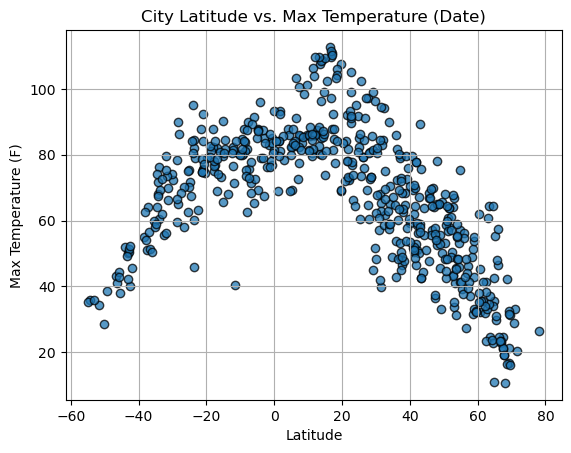

In [28]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (F)"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

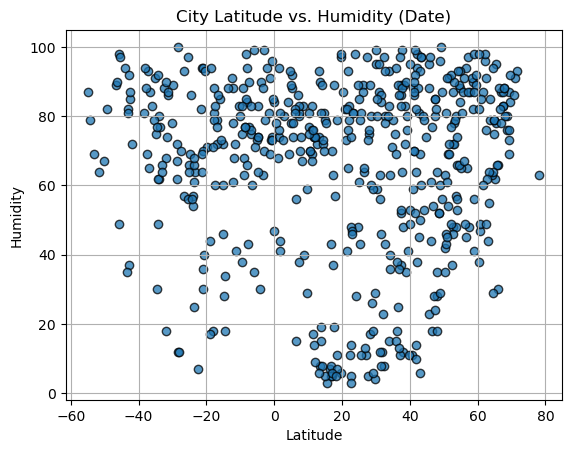

In [29]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

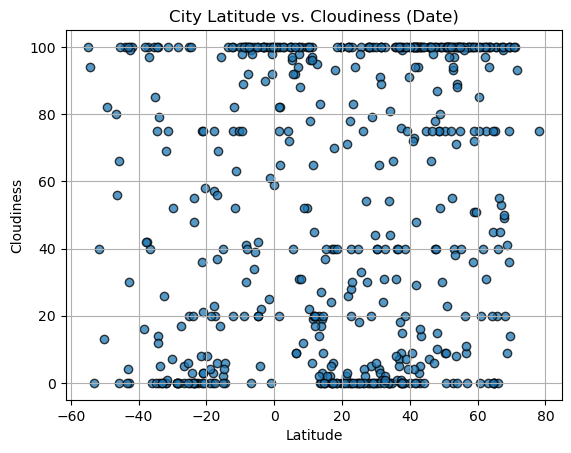

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

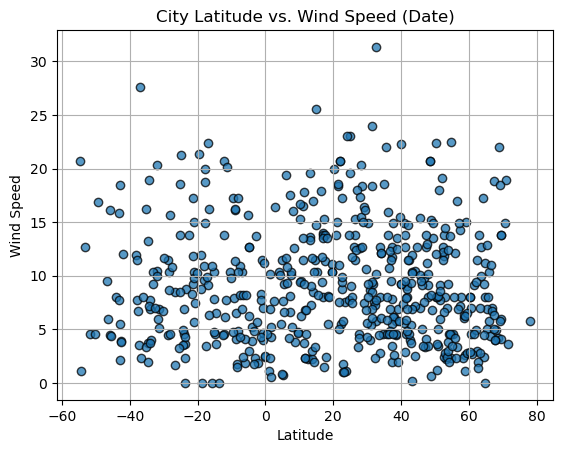

In [31]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the line equation on the plot
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")

    #Include Title with R-Value in title
    title_with_r = f"{title}\nR = {round(rvalue, 2)}"
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title_with_r)
    
    # Show legend
    plt.legend()

    # Show plot
    plt.show()


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,broome,42.2506,-75.8330,50.90,94,100,11.50,US,1714919072
3,jiwani,25.0500,61.7417,85.19,61,0,23.04,PK,1714919059
5,jinxiang,27.4327,120.6062,69.22,97,30,3.36,CN,1714919072
6,dudinka,69.4058,86.1778,16.68,87,36,5.99,RU,1714919072
9,hawaiian paradise park,19.5933,-154.9731,69.03,97,100,10.36,US,1714919072


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,78.93,71,8,21.41,MU,1714919072
1,callao,-12.0667,-77.1500,76.71,88,100,4.61,PE,1714919072
4,papatowai,-46.5619,169.4708,43.14,89,80,9.51,NZ,1714919072
7,waitangi,-43.9535,-176.5597,51.82,94,100,8.01,NZ,1714919072
8,buala,-8.1450,159.5921,81.66,84,100,4.81,SB,1714919072


###  Temperature vs. Latitude Linear Regression Plot

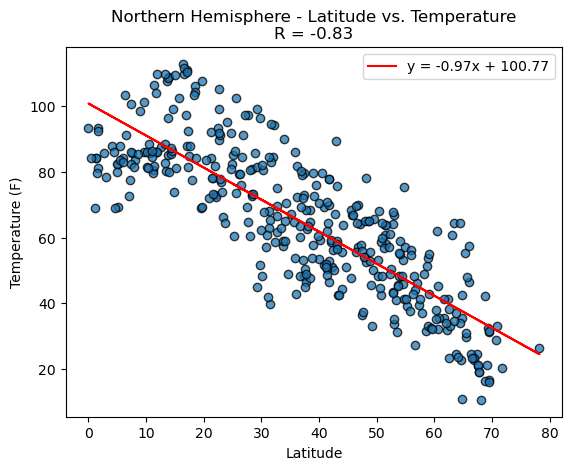

In [46]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp (F)'], 'Latitude', 'Temperature (F)', 'Northern Hemisphere - Latitude vs. Temperature', (10, 270))

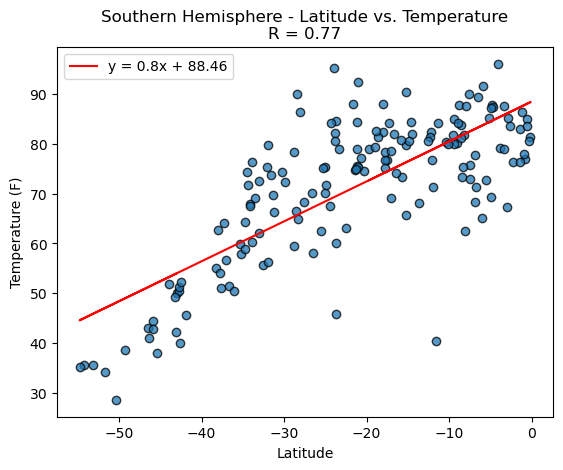

In [47]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp (F)'], 'Latitude', 'Temperature (F)', 'Southern Hemisphere - Latitude vs. Temperature', (10, 270))

**Discussion about the linear relationship:** Northern Hemisphere: There is a negative correlation between Latitude and Temperature in the Northern Hemisphere.  As the latitude increases, the temperature decreases.  Southern Hemisphere: There is a positive correlation between Latitude and Temperature.  As the latitude increases, the temperature also increases.  These are both strong relationships and latitude can be a predictor of temperature in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

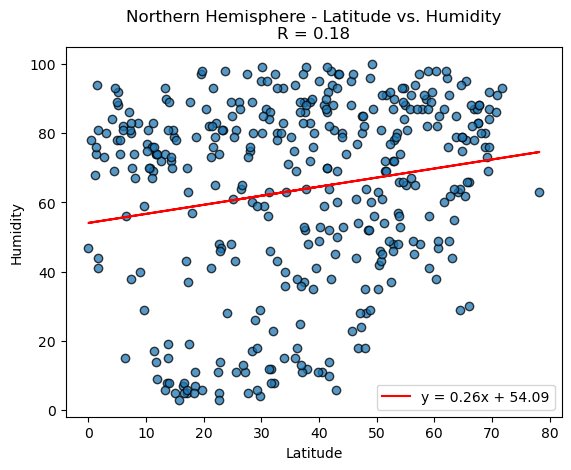

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere - Latitude vs. Humidity', (10, 270))

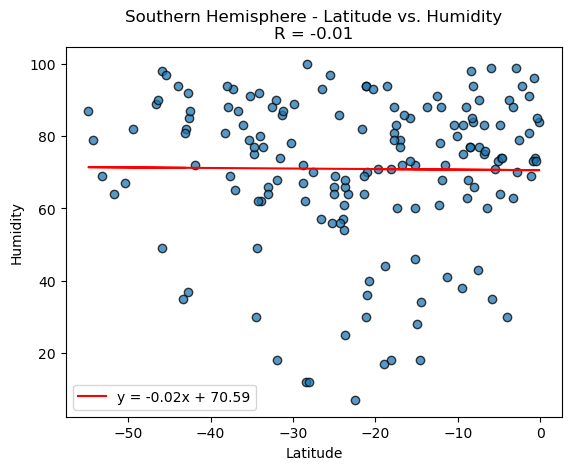

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Southern Hemisphere - Latitude vs. Humidity', (10, 270))

**Discussion about the linear relationship:** There does not seem to be a correlation between Latitude and Humidity.  There is a slight increase in humidity as latitude increases in the Northern and a slight decrease in humidity as latitude increases Southern Hemispheres.  However, the relationship does not show a correlation.

### Cloudiness vs. Latitude Linear Regression Plot

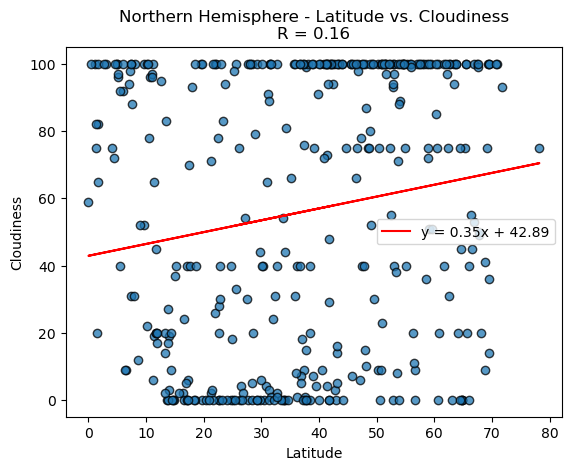

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern Hemisphere - Latitude vs. Cloudiness', (10, 270))

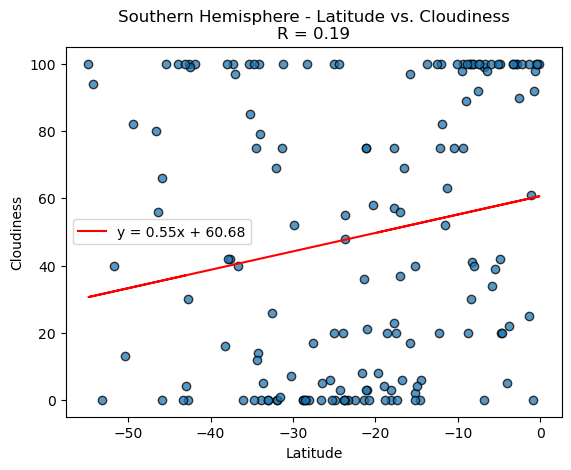

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Southern Hemisphere - Latitude vs. Cloudiness', (10, 270))

**Discussion about the linear relationship:** There does not seem to be a correlation between Latitude and Cloudiness.  There is a slight increase in cloudiness as latitude increases in both the Northern and Southern Hemispheres.  However, the relationship show that there is a correlation.

### Wind Speed vs. Latitude Linear Regression Plot

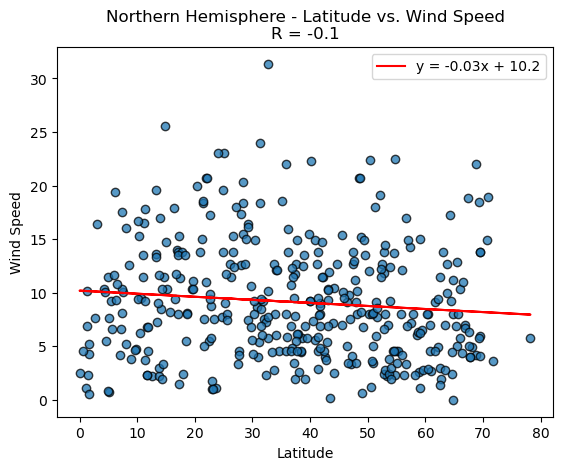

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - Latitude vs. Wind Speed', (10, 270))

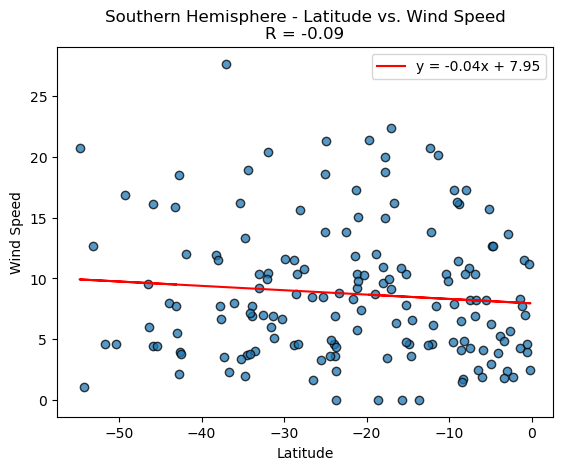

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere - Latitude vs. Wind Speed', (10, 270))

**Discussion about the linear relationship:** There does not seem to be a correlation between Latitude and Wind Speed.  There is a slight decrease in windspeed as latitude increases in both the Northern and Southern Hemispheres.  However, the relationship does not show that there is correlatation.